In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

# synthetic dataset for classification (binary) 
x, y = make_classification(n_samples = 500, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

Question 1: Use cross_var_score to apply logistic regression and cross validation with 5 folds to the dataset X,y as above.

In [2]:
cvNumber=5  #Number of folds
Estimator = KNeighborsClassifier(n_neighbors = 3) #Create the function for measuring K neighbors, where k = 5

cv_scores = cross_val_score(Estimator, x, y, cv=cvNumber) #Measure the score using cross validation, ranging from 0 to 1

print('Cross-validation scores ({}-fold): {}'.format(cvNumber,cv_scores))
print('Mean cross-validation score ({}-fold): {:.3f}'
     .format(cvNumber,np.mean(cv_scores)))


Cross-validation scores (5-fold): [0.84158416 0.79207921 0.82       0.76767677 0.77777778]
Mean cross-validation score (5-fold): 0.800


Question 2: Use validation_curve and 5 folds to see the effect of changing the parameter C in LogisticRegression. This parameter controls regularization. Low values of C is high amounts of regularization, and high values of C are low amounts of Regularization. You should use powers of 10 varying from $10^{-3}$ to $10^3$.  Graph the training scores versus the testing scores. Use plt.loglog() instead of plt.plot() for a log scale plot. What is the best value of C? What's your best score?


In [3]:
param_range = range(1,1000) #Creates for the values of k used

from sklearn.svm import SVC

param_range = np.logspace(-3,3) #In order to test a range from 10^-3 to 10^3, I did some research and found logspace was the
#best route, using a Support Vector Classifier as it allowed for the cummulative nature of my range

#Split up my scoring data into training and testing data
train_scores, test_scores = validation_curve(
    SVC(), x, y, param_name="gamma", param_range=param_range,
    cv=cvNumber, scoring="accuracy", n_jobs=1)

print("average across training folds:\n",np.mean(train_scores, axis=1))
print("average across testing folds:\n",np.mean(test_scores, axis=1))
print("standard deviation for training data:\n",np.std(train_scores, axis=1))
print("standard deviation for testing data:\n",np.std(test_scores, axis=1))

average across training folds:
 [0.68049216 0.68249468 0.6859997  0.69199473 0.69399723 0.69699475
 0.69749849 0.69999477 0.70449354 0.7059973  0.70900107 0.71099983
 0.71049359 0.71249359 0.71799485 0.72349237 0.73548743 0.74348747
 0.74898    0.75998256 0.78049142 0.80598904 0.82349787 0.83799793
 0.84449672 0.84549047 0.84548422 0.84598423 0.85348926 0.85648803
 0.85948179 0.86548682 0.8699906  0.87399187 0.88200066 0.89200196
 0.90249951 0.91200206 0.92099836 0.93000091 0.9390047  0.94900476
 0.95899729 0.97249861 0.97700238 0.98499992 0.9895037  0.99200121
 0.99250246 0.99450122]
average across testing folds:
 [0.67793399 0.6799538  0.679974   0.69393479 0.69791499 0.69791499
 0.6999554  0.69787539 0.69989559 0.69991539 0.69789559 0.69989559
 0.70391579 0.70987619 0.71193639 0.72183738 0.73589839 0.74185879
 0.73579818 0.74981958 0.77190079 0.79594279 0.81386479 0.81980538
 0.83390679 0.83984738 0.83986719 0.83982718 0.83580698 0.83980738
 0.83580698 0.82980658 0.82180618 0.821846

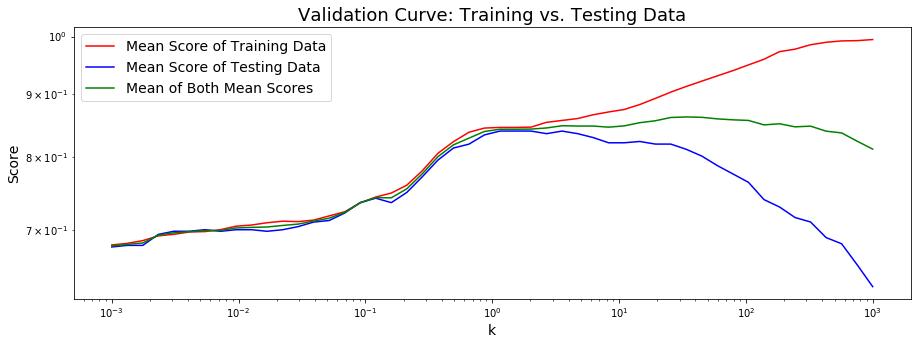

In [21]:
#Finds the mean across the folds in the testing and training data, and putting it all into a single column
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

#Tool to help analysis
train_test_mean = (train_scores_mean+test_scores_mean)/2

plt.figure(figsize = (15,5))
plt.loglog(param_range,train_scores_mean, 'r-',label = 'Mean Score of Training Data')
plt.loglog(param_range,test_scores_mean, 'b-',label = 'Mean Score of Testing Data')
plt.loglog(param_range,train_test_mean, 'g-', label = 'Mean of Both Mean Scores')
plt.title('Validation Curve: Training vs. Testing Data', fontsize = 18)
plt.ylabel('Score',fontsize = 14)
plt.xlabel('k',fontsize = 14)
plt.legend(fontsize=14)
plt.show()

Based on my validation curve, I find the best score to be approximately 0.84, where k approximately is 3. I came to this conclusion as both the curves for training and testing data are practically intersecting at a high score. As we decrease k, the curves still stay close, but the score descreases, causing underfitting. Then as we increase k, both of the curves move farther away from each other, with the training data getting a higher score, while testing data getting a lower score

Question 3: Use gridseachCV to find the best paramaters to use for kNN with this model. You should vary over $p$ and n_neighbors. You pick the ranges to try. What's your best parameter set and score? How does it compare to LogisticRegression? Then use a larger grid and RandomSearch to see if you can do any better.

In [8]:
from sklearn.model_selection import GridSearchCV

param_range2 = range(1,333,2)

#Create my k values, which is from 1 to 333 on odd values, as anything higher causes errors
grid_values = {'n_neighbors': param_range2}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(KNeighborsClassifier(), param_grid = grid_values, cv=3, iid=False)
grid_clf_acc.fit(x, y)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): {:.3f}'.format(grid_clf_acc.best_score_))
grid_clf_acc.best_estimator_

Grid best parameter (max. accuracy):  {'n_neighbors': 13}
Grid best score (accuracy): 0.834


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [9]:
#Create a range for the size of our testing data
p_range = range(1,10)

grid_values2 = {'n_neighbors': param_range2,'p':p_range}

#Create a grid search function based on  the neighbor and p parameters
grid_clf_acc2 = GridSearchCV(KNeighborsClassifier(), param_grid = grid_values2, cv=cvNumber, iid=False)
#Apply grid functions
grid_clf_acc2.fit(x, y)
print('Grid best parameter (max. accuracy): ', grid_clf_acc2.best_params_)
print('Grid best score (accuracy): {:.3f}'.format(grid_clf_acc2.best_score_))

Grid best parameter (max. accuracy):  {'n_neighbors': 19, 'p': 3}
Grid best score (accuracy): 0.846


In [10]:
#Function to help test different p ranges without writing so much code
def checkForBest(p_range3):
    grid_values3 = {'n_neighbors': param_range2,'p':p_range3}
    grid_clf_acc3 = GridSearchCV(KNeighborsClassifier(), param_grid = grid_values3, cv=cvNumber, iid=False)
    grid_clf_acc3.fit(x, y)
    print('Grid best parameter (max. accuracy): ', grid_clf_acc3.best_params_)
    print('Grid best score (accuracy): {:.3f}'.format(grid_clf_acc3.best_score_))

In [11]:
checkForBest(range(10,20))

Grid best parameter (max. accuracy):  {'n_neighbors': 17, 'p': 10}
Grid best score (accuracy): 0.842


In [12]:
##This one takes a lot of time, so just skip it. I was trying it to see what I'd get
checkForBest(range(20,100)) 

KeyboardInterrupt: 

In [13]:
#This is where I saw my best parameters. No need to run as it printed out this:
#Grid best parameter (max. accuracy):  {'n_neighbors': 21, 'p': 100}
#Grid best score (accuracy): 0.840

checkForBest(range(100,150))

Grid best parameter (max. accuracy):  {'n_neighbors': 21, 'p': 100}
Grid best score (accuracy): 0.840


In [14]:
print(y.shape)

(500,)


In [15]:
from sklearn.model_selection import RandomizedSearchCV
#Create and apply a randomized search function
grid_rand=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=grid_values2, 
                             cv=cvNumber, iid=False)
grid_rand.fit(x,y)
print('Grid best parameter (max. accuracy): ', grid_rand.best_params_)
print('Grid best score (accuracy): {:.3f}'.format(grid_rand.best_score_))

Grid best parameter (max. accuracy):  {'p': 3, 'n_neighbors': 17}
Grid best score (accuracy): 0.836


In [16]:
#Apply a randomized search based on the k parameter from before, but with a bigger range for p
grid_values4 = {'n_neighbors': param_range2,'p':range(1,500)}
grid_rand=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=grid_values4, 
                             cv=cvNumber, iid=False)
grid_rand.fit(x,y)
print('Grid best parameter (max. accuracy): ', grid_rand.best_params_)
print('Grid best score (accuracy): {:.3f}'.format(grid_rand.best_score_))

Grid best parameter (max. accuracy):  {'p': 455, 'n_neighbors': 15}
Grid best score (accuracy): 0.828


So by far, the best score I can get was 0.84, with k=21 and p=100. There were other values for p where the score was higher, but they were smaller than 10, meanin g that the testing sample would be very small compared to the training data. p=100 is good as there are 500 samples, meaning the testing only takes 1/5 of all the data. To come to this conclusion took some time using the grid search as it looks through every possible combination of k and p. But when I used the randomizer, it got really close as it chose a random value for p that seem to be higher than most. In my case, it chose 9=151 and k=11, which is still a very good parameter.

Question 4: For each of the following confusion matrices, compute accuracy, precision, recall, and false positive rate. Do not change any of the parameters here. 



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5) 

log_reg=LogisticRegression(solver='lbfgs').fit(X_train,y_train)
confusion = confusion_matrix(y_test,log_reg.predict(X_test))
print(confusion)
print(confusion.shape)

svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

classifyC = np.array([['TN=51','FP=17'],['FN=15','TP=42']])
print(classifyC)

[[51 17]
 [15 42]]
(2, 2)
[['TN=51' 'FP=17']
 ['FN=15' 'TP=42']]


In [18]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# False Positive Rate = FP / (TN + FP)

Precision = confusion[1,1]/(confusion[1,1]+confusion[0,1])
Recall = confusion[1,1]/(confusion[1,1]+confusion[1,0])
FPR = confusion[0,1]/(confusion[0,0]+confusion[0,1])

print('Accuracy: {}'.
      format((confusion[0,0]+confusion[1,1])/(confusion[0,0]+confusion[0,1]
                                             +confusion[1,0]+confusion[1,1])))

print('Precision: {}'.format(Precision))

print('Recall: {}'.format(Recall))
      
print('False Positive Rate: {}'.format(FPR))

Accuracy: 0.744
Precision: 0.711864406779661
Recall: 0.7368421052631579
False Positive Rate: 0.25


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2).fit(X_train,y_train)
confusion2 = confusion_matrix(y_test,knn.predict(X_test))
print(confusion2)

[[64  4]
 [ 8 49]]


In [20]:
Precision2 = confusion2[1,1]/(confusion2[1,1]+confusion2[0,1])
Recall2 = confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])
FPR2 = confusion2[0,1]/(confusion2[0,0]+confusion2[0,1])

print('Accuracy: {}'.
      format((confusion2[0,0]+confusion2[1,1])/(confusion2[0,0]+confusion2[0,1]
                                             +confusion2[1,0]+confusion2[1,1])))

print('Precision: {}'.format(Precision2))

print('Recall: {}'.format(Recall2))
      
print('False Positive Rate: {}'.format(FPR2))

Accuracy: 0.904
Precision: 0.9245283018867925
Recall: 0.8596491228070176
False Positive Rate: 0.058823529411764705


Question 5: Read/run the rest of the Day 14 Jupyter Notebook for the sections on DummyClassifiers, Precision/Recall curves and ROC curves. There is one line that doesn't work. Remove it. What questions do you have about these concepts/implementations? Write at least two.

My first question is on what purpose we have into the dummy classes and confusion matrices. I thought the whole point of validation curves, grid searches, and the randomize search was for the purpose of finding the best possible parameters, such that k and the size of the testing data would be accurate parameters.

My second question is how reliable randomized search is. I know it is conveient for finding parameters in a shorter amount of time, but there are so many different possibilities than the random one it choses. I know grid search takes longer, but is there a way of increasing the accuracy of the randomized search?